In [180]:
!pip install pandas

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [182]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5


In [183]:
import os

# List files in the dataset folder
files = os.listdir('/root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5')
print(files)


['Unemployment_Rate_upto_11_2020.csv', 'Unemployment in India.csv']


In [184]:
import pandas as pd

# Define the path to the dataset
file_path = '/root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5/Unemployment_Rate_upto_11_2020.csv'

In [185]:
# Load the dataset
data = pd.read_csv(file_path)

In [186]:
# Show the first 5 rows of the dataset
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [187]:
# Check the data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [188]:
print(data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [189]:
data = data.dropna()  # Drop missing values
data = data.drop_duplicates()  # Drop duplicate rows

In [190]:
# Strip leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Now try to strip the 'Date' column
data['Date'] = data['Date'].str.strip()


# Convert to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# Check the result
print(data['Date'].head())


0   2020-01-31
1   2020-02-29
2   2020-03-31
3   2020-04-30
4   2020-05-31
Name: Date, dtype: datetime64[ns]


In [191]:
# Extract Year and Month from the 'Date' column
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [193]:
# Select features and target variable
X = data[['Year', 'Month', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = data['Estimated Unemployment Rate (%)']

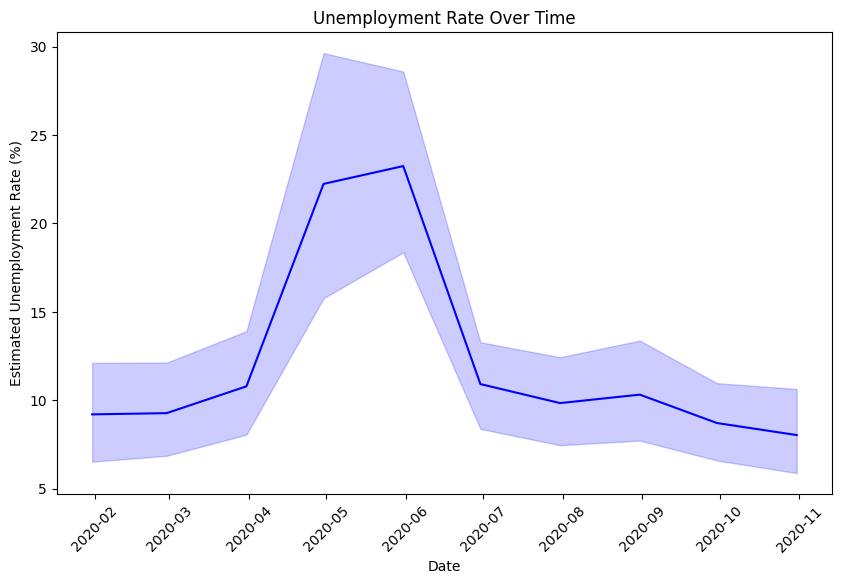

In [196]:
# 1. Time Series - Unemployment Rate Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', color='blue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

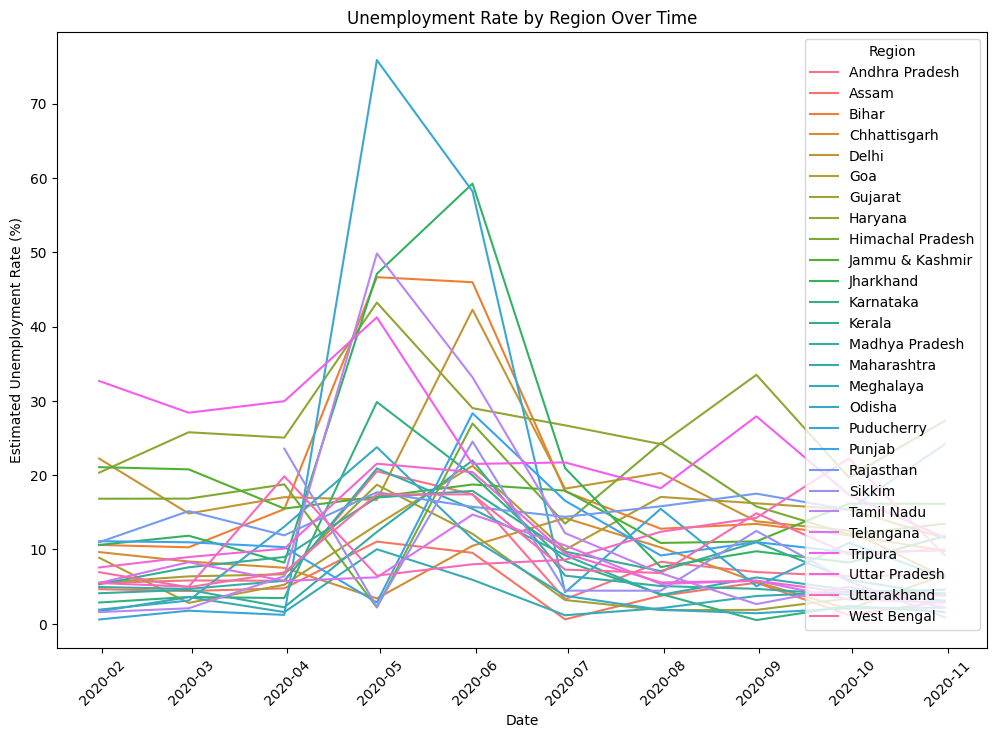

In [197]:
# 2. Region-wise Unemployment Rate
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right')
plt.show()

In [198]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Time-based Model

In [207]:
from statsmodels.tsa.arima.model import ARIMA

In [210]:
# ARIMA Model (tune p, d, q as necessary)
model = ARIMA(data['Estimated Unemployment Rate (%)'], order=(5,1,0))
model_fit = model.fit()

# Forecast the next 12 months (for example)
forecast = model_fit.forecast(steps=12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

<ipython-input-211-7a5af4a91754>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast')


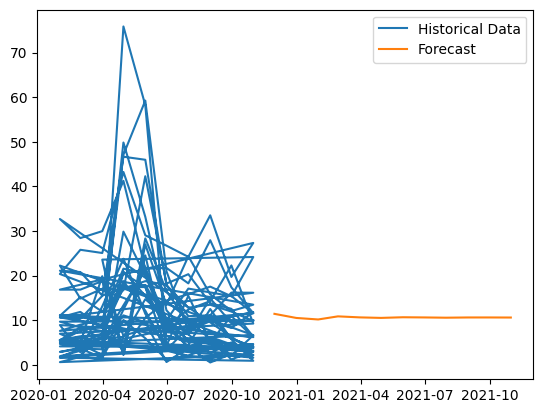

In [211]:
# Visualize the forecast
plt.plot(data.index, data['Estimated Unemployment Rate (%)'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast')
plt.legend()
plt.show()

#Region-based Prediction

In [205]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encoding for 'Region' (since it's categorical)
X = pd.get_dummies(X, drop_first=True)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the evaluation metrics
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)



Random Forest Mean Squared Error: 45.89415650148152
Random Forest R-squared: 0.5121536569378415


In [206]:
#Get user input for prediction
region_input = input("Enter the Region: ")  # e.g. 'Tamil Nadu'
estimated_employed_input = int(input("Enter the Estimated Employed: "))  # e.g. 500000
labour_participation_rate_input = float(input("Enter the Estimated Labour Participation Rate (%): "))  # e.g. 55

# Create a DataFrame for the new input data
new_data_rf = pd.DataFrame({
    'Region': [region_input],
    'Estimated Employed': [estimated_employed_input],
    'Estimated Labour Participation Rate (%)': [labour_participation_rate_input]
})

# One-hot encode the new region
new_data_encoded_rf = pd.get_dummies(new_data_rf, drop_first=True)

# Ensure the new data has the same columns as the training data
new_data_encoded_rf = new_data_encoded_rf.reindex(columns=X.columns, fill_value=0)

# Predict the unemployment rate for the new data point
predicted_unemployment_rate_rf = rf_model.predict(new_data_encoded_rf)

# Show the prediction result
print("Predicted Unemployment Rate using Random Forest for the given data:", predicted_unemployment_rate_rf[0])

Enter the Region: Tamil Nadu
Enter the Estimated Employed: 500000
Enter the Estimated Labour Participation Rate (%): 55
Predicted Unemployment Rate using Random Forest for the given data: 11.677399999999995
